# Python Programming, Visualization and Text Analysis
## Final Submission - Maryam Khan


# Introduction

For the purpose of this project I chose the Disneyland dataset that gives customer reviews for different disneyland branches around the world. The dataset contains 42656 observations/reviews. I will be using the review text to carryout a sentiment analysis. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
sns.set()
%matplotlib inline 
import re 
import string 
import math

In [3]:
url = "https://raw.githubusercontent.com/emanuelemassaro/pois/master/indonesia_education.csv"
df = pd.read_csv(url)

df = pd.read_csv('/Users/maryamkhan/Downloads/DisneylandReviews.csv',encoding='latin-1')
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


# EDA

In [4]:
df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [5]:
# Checking for missing data
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

### Which branch is the most popular?

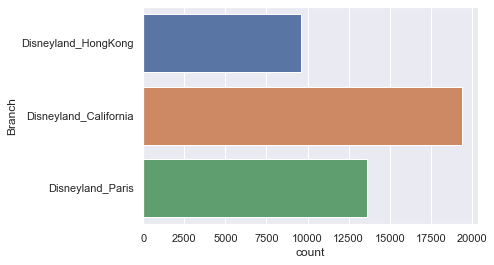

In [6]:
sns.countplot(y="Branch", data=df)
plt.show()

### Highest rated branch

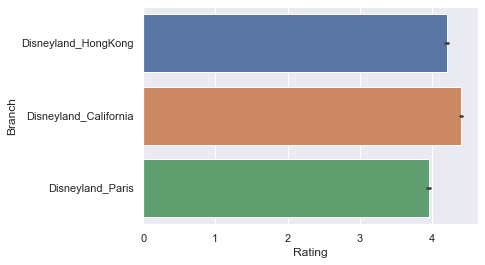

In [7]:
sns.barplot(y=df['Branch'],x=df['Rating'])
plt.show()

### Distribution of Rating

In [4]:
ratings = pd.DataFrame(df.groupby('Rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
ratings.head()

,Rating,No of Users
0,5,23146
1,4,10775
2,3,5109
3,2,2127
4,1,1499


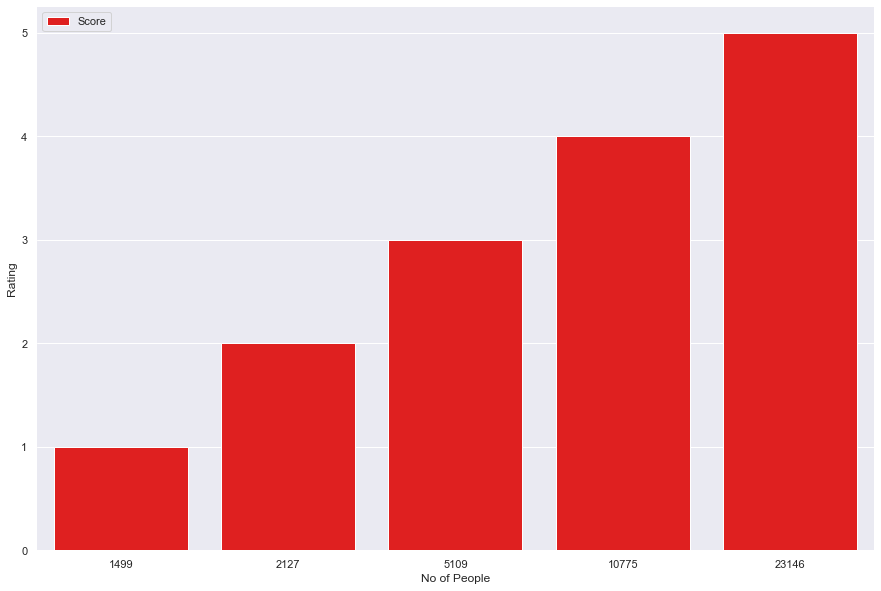

In [5]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("dark") 
sns.barplot(y="Rating", x="No of Users", data=ratings.iloc[:20, :10],label="Score", color="red")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="No of People",ylabel="Rating") 
sns.despine(left=True, bottom=True)
plt.show()

# Data cleaning

In [ ]:
#df['Review_Text'] = df['Review_Text'].apply(lambda x: x.split(',')[0])

In [6]:
df['Review_Text']

0        If you've ever been to Disneyland anywhere you...
1        Its been a while since d last time we visit HK...
2        Thanks God it wasn   t too hot or too humid wh...
3        HK Disneyland is a great compact park. Unfortu...
4        the location is not in the city, took around 1...
                               ...                        
42651    i went to disneyland paris in july 03 and thou...
42652    2 adults and 1 child of 11 visited Disneyland ...
42653    My eleven year old daughter and myself went to...
42654    This hotel, part of the Disneyland Paris compl...
42655    I went to the Disneyparis resort, in 1996, wit...
Name: Review_Text, Length: 42656, dtype: object

In [7]:
for index,text in enumerate(df['Review_Text'][35:40]):
    print('Review %d: \n'%(index+1), text)

Review 1: 
 Australian family of four with 2 kids (12 and 9) enjoyed a full day out at Hong Kong Disneyland with plenty to do and see.If you have been to other Disney's and get a chance to visit Hong Kong   I say definitely do it. There are a couple of unique Hong Kong experiences including two Marvel attractions   Antman and Ironman   both which we enjoyed.For thrill seekers there are a couple of great rides   The Big Grizzly Mountain was probably our favourite   it was unexpected and fast. And the RC Racer in Toystoryland definitely worth the wait.For families with younger kids there is heaps here to do   we kind of skipped fantasyland   but for young families you would probably spend a lot of the day here.The park is easy to get to as well   the dedicated Disney train line was fun to ride on   and with an easily navigable MTR in Hong Kong it was simple and cheap to get to the Park.
Review 2: 
 If your are travelling to Disney land from mong cok you can purchase your tickets from one

### Remove Contractions

In [8]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}





In [9]:
contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))

In [10]:
                             
# Function for expanding contractions:
def expand_contractions(text, contractions=contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [11]:
# Expanding Contractions in the review texts:
df['no_contractions'] = df['Review_Text'].apply(lambda x: expand_contractions(x))
df[['Review_Text', 'no_contractions']].head()

,Review_Text,no_contractions
0,If you've ever been to Disneyland anywhere you...,If you have ever been to Disneyland anywhere y...
1,Its been a while since d last time we visit HK...,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1..."


### Lower case the text

In [12]:
df['lower_case'] = df['no_contractions'].apply(lambda x: x.lower())
df[['Review_Text', 'lower_case']].head()

,Review_Text,lower_case
0,If you've ever been to Disneyland anywhere you...,if you have ever been to disneyland anywhere y...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1..."


### Remove digits and punctuations 

In [13]:
df['no_digits'] = df['lower_case'].apply(lambda x: re.sub('\w*\d\w*','', x))
df[['Review_Text', 'no_digits']].head()

,Review_Text,no_digits
0,If you've ever been to Disneyland anywhere you...,if you have ever been to disneyland anywhere y...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...
4,"the location is not in the city, took around 1...","the location is not in the city, took around ..."


In [14]:
df['no_punct'] = df['no_digits'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df[['Review_Text', 'no_punct']].head()

,Review_Text,no_punct
0,If you've ever been to Disneyland anywhere you...,if you have ever been to disneyland anywhere y...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park unfortun...
4,"the location is not in the city, took around 1...",the location is not in the city took around h...


In [15]:
df['no_punct'] = df['no_punct'].apply(lambda x: re.sub(' +', ' ',x))
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,no_contractions,lower_case,no_digits,no_punct
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,If you have ever been to Disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park unfortun...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","the location is not in the city, took around ...",the location is not in the city took around ho...


### Remove stopwords using nltk

In [16]:
import nltk

from nltk.corpus import stopwords

stop = stopwords.words('english')

df['no_stop_words'] = df['no_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df[['Review_Text','no_stop_words']].head()

,Review_Text,no_stop_words
0,If you've ever been to Disneyland anywhere you...,ever disneyland anywhere shall find disneyland...
1,Its been a while since d last time we visit HK...,since last time visit hk disneyland yet time s...
2,Thanks God it wasn t too hot or too humid wh...,thanks god hot humid visiting park otherwise w...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland great compact park unfortunately...
4,"the location is not in the city, took around 1...",location city took around hour kowlon kids lik...


In [17]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,no_contractions,lower_case,no_digits,no_punct,no_stop_words
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,If you have ever been to Disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,ever disneyland anywhere shall find disneyland...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,since last time visit hk disneyland yet time s...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid when...,thanks god hot humid visiting park otherwise w...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park unfortun...,hk disneyland great compact park unfortunately...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","the location is not in the city, took around ...",the location is not in the city took around ho...,location city took around hour kowlon kids lik...


In [18]:
df_grouped = df[['Branch', 'no_stop_words']].groupby(by='Branch').agg(lambda x: ' '.join(x))
df_grouped

,no_stop_words
Branch,
Disneyland_California,place always forever special feeling get enter...
Disneyland_HongKong,ever disneyland anywhere shall find disneyland...
Disneyland_Paris,weve disneyland hongkong tokyo far one best lo...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')


data = cv.fit_transform(df_grouped['no_stop_words'])
data_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_grouped.index
data_dtm.head()

/Users/maryamkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaand,aaaages,aaahhh,aaahs,aaamembers,aaarrr,aaat,aack,...,zootopia,zoover,zooworth,zorbs,zorg,zs,zulqairil,zurg,zurgs,zurich
Branch,,,,,,,,,,,,,,,,,,,,,
Disneyland_California,1,53,0,0,0,0,1,1,0,1,...,0,0,1,0,1,1,0,4,0,0
Disneyland_HongKong,2,1,1,0,1,0,0,0,0,0,...,4,0,0,0,0,0,1,1,1,0
Disneyland_Paris,1,1,0,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,3,1,1


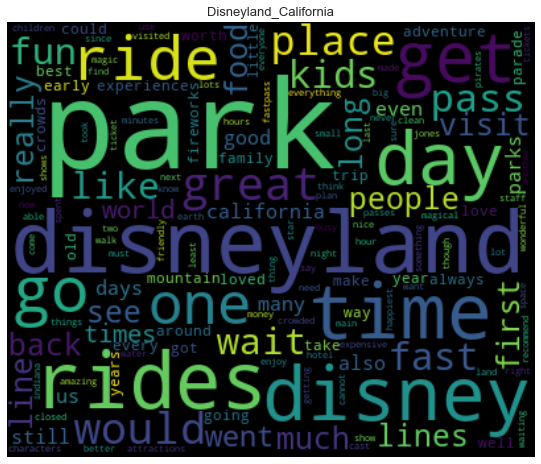

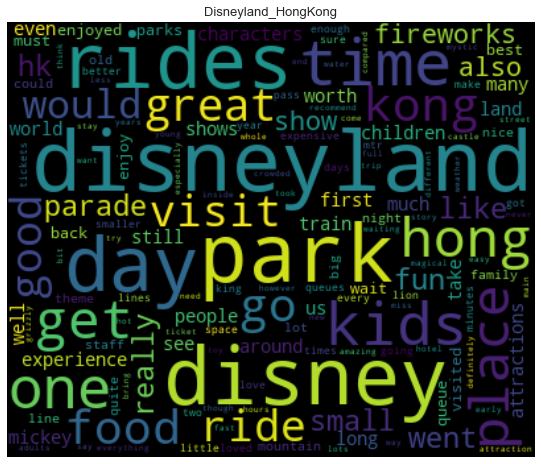

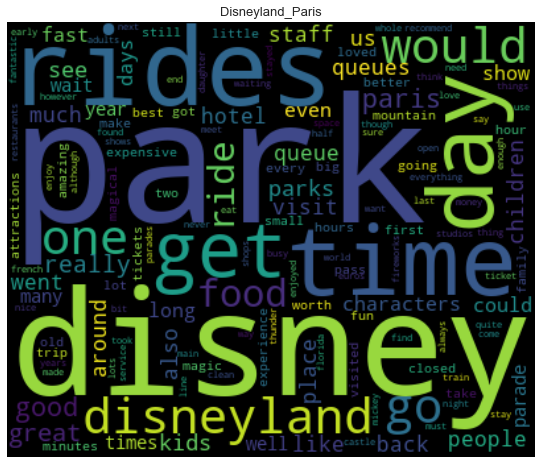

In [20]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150).generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
data_dtm=data_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(data_dtm.columns):
  generate_wordcloud(data_dtm[product].sort_values(ascending=False),product)

In [21]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer() 


In [22]:
df['sentiment_score']=df['Review_Text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])

In [23]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,no_contractions,lower_case,no_digits,no_punct,no_stop_words,sentiment_score
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,If you have ever been to Disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,ever disneyland anywhere shall find disneyland...,0.7069
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,since last time visit hk disneyland yet time s...,0.9853
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid when...,thanks god hot humid visiting park otherwise w...,0.9920
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park unfortun...,hk disneyland great compact park unfortunately...,0.8425
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","the location is not in the city, took around ...",the location is not in the city took around ho...,location city took around hour kowlon kids lik...,0.2846


In [25]:
df['neutral'] = df['Review_Text'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
df['negative'] = df['Review_Text'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
df['positive'] = df['Review_Text'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

In [26]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,no_contractions,lower_case,no_digits,no_punct,no_stop_words,sentiment_score,neutral,negative,positive
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,If you have ever been to Disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,ever disneyland anywhere shall find disneyland...,0.7069,0.891,0.000,0.109
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,since last time visit hk disneyland yet time s...,0.9853,0.760,0.044,0.195
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid when...,thanks god hot humid visiting park otherwise w...,0.9920,0.758,0.022,0.220
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park unfortun...,hk disneyland great compact park unfortunately...,0.8425,0.768,0.078,0.154
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","the location is not in the city, took around ...",the location is not in the city took around ho...,location city took around hour kowlon kids lik...,0.2846,0.902,0.000,0.098


In [27]:
df['sentiment_category']=''
df.loc[df.sentiment_score>0.05, 'sentiment_category']='Positive'
df.loc[(df.sentiment_score>-0.05) & (df.sentiment_score<0.05), 'sentiment_category']='Neutral'
df.loc[df.sentiment_score<-0.05, 'sentiment_category']='Negative'

In [28]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,no_contractions,lower_case,no_digits,no_punct,no_stop_words,sentiment_score,neutral,negative,positive,sentiment_category
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,If you have ever been to Disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,if you have ever been to disneyland anywhere y...,ever disneyland anywhere shall find disneyland...,0.7069,0.891,0.000,0.109,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,its been a while since d last time we visit hk...,since last time visit hk disneyland yet time s...,0.9853,0.760,0.044,0.195,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid when...,thanks god hot humid visiting park otherwise w...,0.9920,0.758,0.022,0.220,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland is a great compact park unfortun...,hk disneyland great compact park unfortunately...,0.8425,0.768,0.078,0.154,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","the location is not in the city, took around ...",the location is not in the city took around ho...,location city took around hour kowlon kids lik...,0.2846,0.902,0.000,0.098,Positive


### Sentiment category distribution for all branches

In [38]:


hk = df[df['Branch'].str.contains("Disneyland_HongKong")]
cal = df[df['Branch'].str.contains("Disneyland_California")]
paris = df[df['Branch'].str.contains("Disneyland_Paris")]

#hk.head()

/var/folders/37/4k1d0wpn1f93kk7bkjx3nwq00000gn/T/ipykernel_1424/1357414549.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


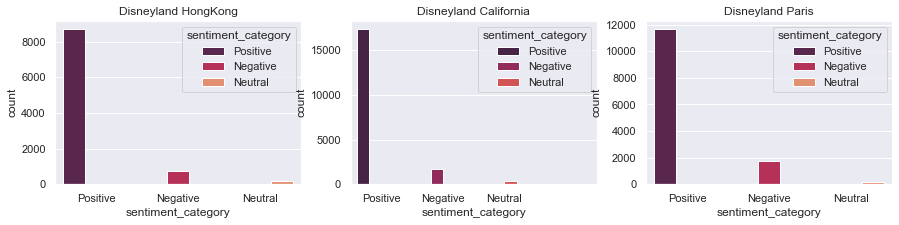

In [43]:
fig, ax =plt.subplots(1,3)
sns.countplot(x='sentiment_category', hue="sentiment_category", data=hk, palette="rocket", ax=ax[0])
sns.countplot(x='sentiment_category', hue="sentiment_category", data=cal, palette="rocket", ax=ax[1])
sns.countplot(x='sentiment_category', hue="sentiment_category", data=paris, palette="rocket", ax=ax[2])
ax[0].title.set_text('Disneyland HongKong')
ax[1].title.set_text('Disneyland California')
ax[2].title.set_text('Disneyland Paris')

fig.show()

/var/folders/37/4k1d0wpn1f93kk7bkjx3nwq00000gn/T/ipykernel_1424/106809903.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


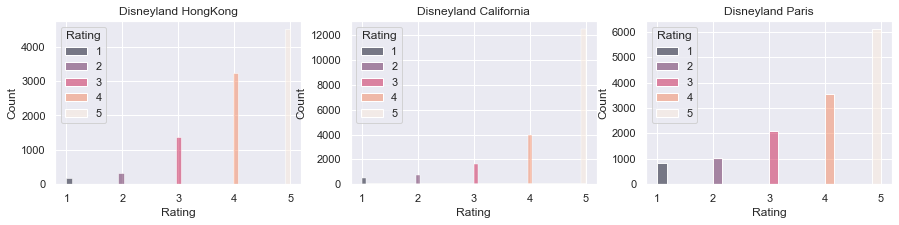

In [49]:
fig, ax =plt.subplots(1,3)
sns.histplot(x='Rating',hue="Rating", data=hk, palette="rocket", ax=ax[0])
sns.histplot(x='Rating', hue="Rating",data=cal, palette="rocket", ax=ax[1])
sns.histplot(x='Rating',hue="Rating", data=paris, palette="rocket", ax=ax[2])
ax[0].title.set_text('Disneyland HongKong')
ax[1].title.set_text('Disneyland California')
ax[2].title.set_text('Disneyland Paris')

fig.show()

In [29]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
string.punctuation
lemmatizer = WordNetLemmatizer()

tfidf_vectorizer = TfidfVectorizer()

from sklearn.feature_extraction.text import CountVectorizer


Count_vectorizer = CountVectorizer()

tfidf = tfidf_vectorizer.fit_transform(df_grouped['no_stop_words'])
print(tfidf)


  (0, 8573)	3.006276092336831e-05
  (0, 31616)	2.2863504563509356e-05
  (0, 22303)	6.012552184673662e-05
  (0, 58625)	3.006276092336831e-05
  (0, 43809)	3.006276092336831e-05
  (0, 33617)	3.006276092336831e-05
  (0, 41845)	3.006276092336831e-05
  (0, 44807)	3.006276092336831e-05
  (0, 31389)	3.006276092336831e-05
  (0, 55294)	3.006276092336831e-05
  (0, 1075)	3.006276092336831e-05
  (0, 31606)	2.2863504563509356e-05
  (0, 32566)	3.006276092336831e-05
  (0, 16229)	3.006276092336831e-05
  (0, 51689)	3.006276092336831e-05
  (0, 315)	3.006276092336831e-05
  (0, 6570)	3.006276092336831e-05
  (0, 59453)	3.006276092336831e-05
  (0, 55159)	2.2863504563509356e-05
  (0, 7877)	3.006276092336831e-05
  (0, 33996)	3.006276092336831e-05
  (0, 14481)	3.006276092336831e-05
  (0, 48591)	3.006276092336831e-05
  (0, 40138)	3.006276092336831e-05
  (0, 38997)	3.006276092336831e-05
  :	:
  (2, 48672)	0.0014800137483012526
  (2, 16088)	0.15515477461358132
  (2, 25590)	0.14583827781337727
  (2, 37672)	0.036089

In [30]:
branch_tfidf= pd.DataFrame(tfidf.toarray().transpose(), index=tfidf_vectorizer.get_feature_names())


branch_tfidf.sort_values (by= [0], inplace=True, ascending=False)
print(branch_tfidf.head(5))

                   0         1         2
park        0.328211  0.291516  0.348638
disneyland  0.295008  0.307458  0.155155
rides       0.246145  0.263676  0.260027
time        0.240321  0.177171  0.211832
disney      0.227768  0.284330  0.301809


/Users/maryamkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
for i in range(1, 4):
    globals()["txt" + str(i)] =branch_tfidf[branch_tfidf.columns[i-1]].values.reshape(1, -1)  

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(txt1,txt3)

array([[0.93179354]])

In [34]:
 consine_matrix = pd.DataFrame({"Disneyland_California":[" ", cosine_similarity(txt1, txt2), cosine_similarity(txt1, txt3)],
                              "Disneyland_HongKong":[cosine_similarity(txt2, txt1)," " , cosine_similarity(txt2, txt3)],
                              "Disneyland_Paris":[cosine_similarity(txt3, txt1), cosine_similarity(txt3, txt2)," " ]})
consine_matrix.index = ["Disneyland_California","Disneyland_HongKong", "Disneyland_Paris"]

In [35]:
consine_matrix

,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
Disneyland_California,,[[0.917299528372986]],[[0.9317935401402113]]
Disneyland_HongKong,[[0.917299528372986]],,[[0.9119047364350237]]
Disneyland_Paris,[[0.9317935401402113]],[[0.9119047364350237]],


## Conclusion

The overall analysis showed that the Disneyland in California was the most popular one with the highest rating followed by Paris and HongKong. The Disneylands in Paris and Hongkong were the most similar with HongKong being a little different to them. 